## Loss function

so far we've described linear regression, shallow neural networks, and deep
neural networks. Each represents a family of functions that map input to output, where
the particular member of the family is determined by the model parameters $\varphi$.

the *least squares loss* function is suitable for *univariate regression*
problems for which the target is a real number $y \in R$

#### Maximum likelihood

Note: The conditional probability $Pr(x |y)$ is the probability of variable $x$ taking a certain value,
assuming we know the value of $y$.

Consider a model
$f[x,\varphi]$ with parameters $\varphi$ that computes an output from input $x$. Until now, we have
implied that the model directly computes a prediction $y$. We now shift perspective and
consider the model as computing a *conditional probability* distribution $Pr(y|x)$ over
possible outputs $y$ given input $x$. The loss encourages each training output $y_i$ to have
a high probability under the distribution $Pr(y_i|x_i)$ computed from the corresponding
input $x_i$

the question is exactly how a model $f[x,\varphi]$ can be adapted
to compute a probability distribution??
the answer is rather simple, first we define a parametric distribution $pr(y|\theta)$ over the output domain $y$, then we use the network to compute one or more of the parmaeters $\theta$ of this distribution.
For example, suppose the prediction domain is the set of real numbers, so $y \in R$.
Here, we might choose the univariate normal distribution, which is defined on $R$. This
distribution is defined by the mean $\mu$ and variance $\sigma^2$, so $\varphi= {\mu,\sigma^2}$. The machine
learning model might predict the mean $\mu$, and the variance $\sigma^2$ could be treated as an unknown constant

Understanding the Term “Univariate Normal Distribution”:
The univariate normal distribution (or Gaussian distribution) is a probability distribution that describes a single continuous random variable. It is characterized by two parameters:
- Mean ($\mu$): The center of the distribution, representing the expected value.
- Variance ($\sigma^2$): A measure of how spread out the values are around the mean.
Mathematically, a univariate normal distribution is expressed as:
$$p(y | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left(-\frac{(y - \mu)^2}{2\sigma^2} \right)$$
where $y$ is the variable we are modeling.
All in one place; Instead of making a single deterministic prediction (e.g., predicting one value for $y$), the model learns a probability distribution over possible values of $y$. This means that for a given input $x$, the model outputs the parameters $(\mu, \sigma^2)$, which define a normal distribution $\mathcal{N}(\mu, \sigma^2)$. so This allows **uncertainty modeling**: the model can express confidence in its predictions by varying $\sigma^2$. If $\sigma^2$ is small, predictions are confident (values are concentrated around $\mu$), whereas a larger $\sigma^2$ indicates more uncertainty.

so from now, we know that The model does not directly output a single value for $y$; instead, it predicts the parameters of a normal distribution.$(\mu, \sigma)$

##### Maximum likelihood criterion:
The model now computes different distribution parameters $\theta_i = f[x_i,\varphi]$ for each training
input $x_i$. Each observed training output $y_i$ should have high probability under its
corresponding distribution $Pr(y_i|\varphi_i)$. Hence, we choose the model parameters $\varphi$ so that
they maximize the combined probability across all $I$ training examples:
$$
\hat{\phi} = argmax_{\phi} \left[ \prod_{i=1}^{I} Pr(y_i | \mathbf{x}_i) \right]
$$

$$
= argmax_{\phi} \left[ \prod_{i=1}^{I} Pr(y_i | \theta_i) \right]
$$

$$= argmax_{\phi} \left[ \prod_{i=1}^{I}Pr(y_i | f(x_i, \phi)) \right]$$

The combined probability term is the likelihood of the parameters, and hence
is known as the *maximum likelihood criterion*

Note: A conditional probability $Pr(z|\psi)$ can be considered in two ways. As a function of $z$, it is a
probability distribution that sums to one. As a function of $\psi$, it is known as a likelihood and does not generally sum to one.

#### research about the **log transform**.

log transform the equation above:
$$
\hat{\phi} = argmax_{\phi} \left[ \prod_{i=1}^{I} Pr(y_i | f(\mathbf{x}_i, \phi)) \right]
$$

$$
= argmax_{\phi} \left[ \log \left( \prod_{i=1}^{I} Pr(y_i | f(\mathbf{x}_i, \phi)) \right) \right]
$$

$$
= argmax_{\phi} \left[ \sum_{i=1}^{I} \log Pr(y_i | f(\mathbf{x}_i, \phi)) \right].
$$

example for using log likelihood over likelihood:
Suppose we have $X = \{x_1, x_2, …, x_n\}$ drawn from a normal distribution $\mathcal{N}(\mu, \sigma^2)$, meaning:
$$p(x_i | \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left( -\frac{(x_i - \mu)^2}{2\sigma^2} \right)$$
so, Likelihood Function:
$$L(\mu, \sigma) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left( -\frac{(x_i - \mu)^2}{2\sigma^2} \right)$$
and log likelihood function:
$$\ell(\mu, \sigma) = \sum_{i=1}^{n} \left[ -\frac{1}{2} \log(2\pi\sigma^2) - \frac{(x_i - \mu)^2}{2\sigma^2} \right]$$

colclusion:
- The likelihood criterion uses $L(\theta)$, which is the probability of data given the model parameters.
- The log-likelihood criterion uses $\ell(\theta)$, which is the logarithm of the likelihood function, making it easier to compute and optimize.
- Since log is a monotonic function, maximizing the likelihood is equivalent to maximizing the log-likelihood, but the latter is computationally and numerically superior.

so to have a loss function, we need a minimization problem, so we multiply the equation above which give us negative log likelihood:
$$
\hat{\phi} = argmin_{\phi} \left[ -\sum_{i=1}^{I} \log \left[ Pr(y_i | \mathbf{f}(\mathbf{x}_i, \phi)) \right] \right]
$$


$$
= argmin_{\phi} \left[ L[\phi] \right],
$$
which is what forms the final loss function $L[\varphi]$.

so for inference The network no longer directly predicts the outputs $y$ but instead determines a probability distribution over $y$. but
When we perform inference, we often want a point estimate
rather than a distribution, so we return the maximum of the distribution:


$$\hat{y} = argmax_{y} \left[ Pr(y | f[x, \hat{\phi}]) \right].$$

Choose a suitable probability distribution $(Pr(y|\theta)$ defined over the domain of the predictions $(y)$ with distribution parameters $(\theta)$. The optimal prediction $(\hat{y})$ is then given by:

$$\hat{y} = \arg\max_{y} \left[ Pr(y | f[x, \phi]) \right].$$


#### Recipe for constructing loss functions:
- Choose a suitable probability distribution $Pr(y|\theta)$ defined over the *domain* of the
predictions $y$ (this *domain* is listed in next markdown) with distribution parameters $\theta$.
- Set the machine learning model $f[x,\varphi]$ to predict one or more of these parameters,
so $\theta= f[x,\varphi]$ and $Pr(y|\theta) = Pr(y|f[x,\varphi])$.
- To train the model, find the network parameters
$\hat\varphi$ that minimize the negative
log-likelihood loss function over the training dataset pairs $\{xi,yi\}$

$$\hat{\phi} = \arg\min_{\phi} \left[ L[\phi] \right] = \arg\min_{\phi} \left[ -\sum_{i=1}^{I} \log \left[ Pr(y_i | f[x_i, \phi]) \right] \right].$$

- To perform inference for a new test example x, return either the full distribution $Pr(y|f[x,\hat\varphi])$ or the value where this distribution is maximized.

**Gaussian distribution**:
The univariate normal distribution (also known as the Gaussian distribution) is defined on the real line $z \in
R$ and has parameters $\mu$ and $\sigma^2$. The
mean $\mu$ determines the position of the
peak. The positive root of the variance $\sigma^2$ (the standard deviation) determines the width of the distribution.
Since the total probability density sums
to one, the peak becomes higher as the
variance decreases and the distribution
becomes narrower.

negative log likelihood for gaussian distribution:
$$
\begin{align*}
\hat{\phi} &= \arg\min_{\phi} \left[ -\sum_{i=1}^{I} \log \left[ \frac{1}{\sqrt{2\pi\sigma^2}} \exp \left[ -\frac{(y_i - f[x_i, \phi])^2}{2\sigma^2} \right] \right] \right] \\
&= \arg\min_{\phi} \left[ -\sum_{i=1}^{I} \left( \log \left[ \frac{1}{\sqrt{2\pi\sigma^2}} \right] - \frac{(y_i - f[x_i, \phi])^2}{2\sigma^2} \right) \right] \\
&= \arg\min_{\phi} \left[ -\sum_{i=1}^{I} \left( -\frac{(y_i - f[x_i, \phi])^2}{2\sigma^2} \right) \right] \\
&= \arg\min_{\phi} \left[ \sum_{i=1}^{I} (y_i - f[x_i, \phi])^2 \right],
\end{align*}
$$

The result of these manipulations is the **least squares loss function**, We see that the least squares loss function follows naturally from the assumptions that the
predictions are ($i$) independent and ($ii$) drawn from a normal distribution with mean $\mu=
f[x_i,\varphi]$

with keeping varinace $\sigma^2$ into consideration we get:
$$\hat{\phi}, \hat{\sigma}^2 = \arg\min_{\phi, \sigma^2} \left[ -\sum_{i=1}^I \log \left[ \frac{1}{\sqrt{2\pi\sigma^2}} \exp \left[ -\frac{(y_i - f[x_i, \phi])^2}{2\sigma^2} \right] \right] \right]$$

In inference, the model predicts the mean $\mu= f[x,
\phi]$ from the input, and we learned the
variance
$\hat\sigma^2$ during the training process. The former is the best prediction. The latter
tells us about the uncertainty of the prediction.

so we can treat the variance as the uncertainty of our prediction? and it's a parameter which should be learnt?

Terminology: In statistics, a sequence of random variables is **homoscedastic** if all its random variables have the same finite variance; this is also known as homogeneity of variance. The complementary notion is called heteroscedasticity, also known as heterogeneity of variance.

The model above assumes that the variance of the data is constant everywhere. However,
this might be unrealistic. When the uncertainty of the model varies as a function of the
input data, we refer to this as heteroscedastic (as opposed to homoscedastic, where the
uncertainty is constant).
A simple way to model this is to train a neural network $f[x,\phi]$ that computes both
the mean and the variance. For example, **consider a shallow network with two outputs**.
We denote the first output as $f1[x,\phi]$ and use this to predict the mean, and we denote
the second output as $f2[x,\phi]$ and use it to predict the variance.
There is one complication; the variance must be positive, but we can’t guarantee
that the network will always produce a positive output. To ensure that the computed
variance is positive, we pass the second network output through a function that maps
an arbitrary value to a positive one. A suitable choice is the squaring function, giving:
$$\mu = f_1[x, \phi]$$
$$\sigma^2 = f_2[x, \phi]^2$$

is
$$\hat{\phi} = \arg\min_{\phi} \left[ -\sum_{i=1}^I \log \left[ \frac{1}{\sqrt{2\pi f_2[x_i, \phi]^2}} \exp \left( -\frac{(y_i - f_1[x_i, \phi])^2}{2 f_2[x_i, \phi]^2} \right) \right] \right]$$

# Binary classification

*Bernoulli distribution*: The
Bernoulli distribution is defined on the
domain $z \in \{0,1\}$and has a single pa-
rameter $\lambda$ that denotes the probability
of observing $z = 1$. It follows that the
probability of observing $z = 0$ is $1−\lambda$.

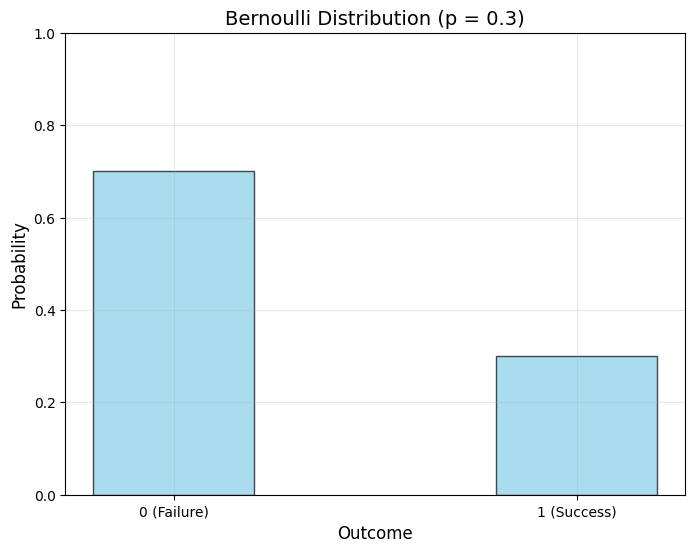

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

# Parameters
p = 0.3  # Probability of success (you can change this value between 0 and 1)

# Possible outcomes for Bernoulli (0 or 1)
x = np.array([0, 1])

# Calculate the PMF (Probability Mass Function) for the Bernoulli distribution
pmf = bernoulli.pmf(x, p)

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(x, pmf, width=0.4, color='skyblue', edgecolor='black', alpha=0.7)

# Add labels and title
plt.title(f'Bernoulli Distribution (p = {p})', fontsize=14)
plt.xlabel('Outcome', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.xticks(x, ['0 (Failure)', '1 (Success)'])
plt.ylim(0, 1)  # Set y-axis limit to [0, 1] for better visualization
plt.grid(True, alpha=0.3)

# Show the plot
plt.show()

*Logistic sigmoid function*.
This function maps the real line $z \in
R$ to numbers between zero and one,
so $sig[z] \in [0,1]$. An input of 0 is mapped
to 0.5. Negative inputs are mapped to
numbers below 0.5, and positive inputs
to numbers above 0.5.

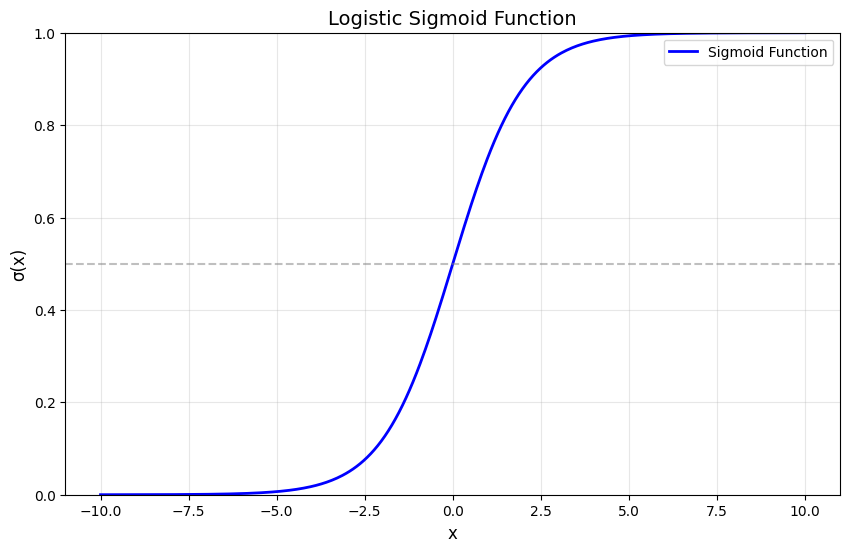

In [3]:
# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate x values
x = np.linspace(-10, 10, 400)  # Range from -10 to 10 with 400 points

# Compute the sigmoid values
y = sigmoid(x)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Sigmoid Function', color='blue', linewidth=2)

# Add horizontal line at y = 0.5 (inflection point)
plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)

# Add labels and title
plt.title('Logistic Sigmoid Function', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('σ(x)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

# Set y-axis limits to [0, 1] since sigmoid outputs are in this range
plt.ylim(0, 1)

# Show the plot
plt.show()

Bernoulli distribution:

$$\text{Pr}(\gamma|\lambda) = (1 - \lambda)^{1 - \gamma} \cdot \lambda^{\gamma} \cdot$$

we use e neuarl network to predict the $\lambda$ for our Bernoulli dist. but to keep the predicted value between $[0, 1]$ we use logistic sigmoid as follows:
$$\text{Pr}(\gamma|\mathbf{x}) = (1 - \text{sig}[f(\mathbf{x}, \phi)])^{1 - \gamma} \cdot \text{sig}[f(\mathbf{x}, \phi)]^{\gamma} \cdot$$

The loss function is
the negative log-likelihood of the training set:

$$L[\phi] = \sum_{i=1}^{I} - \left( (1 - \gamma_i) \log[1 - \text{sig}[f(\mathbf{x}_i, \phi)]] - \gamma_i \log[\text{sig}[f(\mathbf{x}_i, \phi)]] \right) \cdot$$

this is known as the binary **cross-entropy loss**.

*Categorical distribution*:
The categorical distribution assigns probabil-
ities to $K \gt 2$ categories, with associated
probabilities $\lambda_1,\lambda_2,...,\lambda_k$ . Here, there
are five categories, so $K = 5$. To ensure
that this is a valid probability distribution, each parameter $\lambda_k$ must lie in the
range $[0,1]$, and all $K$ parameters must
sum to one.
$$Pr(y = k) = \lambda_k$$

for this multiclass distribution we use a network $f[x,\phi]$ with $K$ outputs to compute these $K$ parameters from
the input $x$. Unfortunately, the network outputs will not necessarily obey the aforementioned constraints. Consequently, we pass the $K$ outputs of the network through a
function that ensures these constraints are respected. A suitable choice is the **softmax**
function. This takes an arbitrary *vector* of length $K$ and returns a vector
of the same length but where the elements are now in the range $[0,1]$ and sum to one.
The $k_{th}$ output of the softmax function is:
$$
softmax_k[\mathbf{z}] = \frac{\exp(z_k)}{\sum_{k'=1}^K \exp(z_{k'})}
$$
here:
- The *numerator* $e^{z_i}$ ensures all values are positive.
- The *denominator* $\sum_{k'=1}^{K} e^{z_k'}$ ensures the outputs sum to 1, making it a valid probability distribution.
- Softmax scales raw scores (*logits*) into probabilities.

##### The Issue of softmax: Overflow and Underflow:
Since $e^z$ grows exponentially, large values can cause overflow, and small values can cause underflow.
##### The Solution: Log-Trick
$$\sigma(z_i) = \frac{e^{z_i - \max(\mathbf{z})}}{\sum_{j=1}^{n} e^{z_j - \max(\mathbf{z})}}$$
this insures that:
- The largest exponent is always $e^0 = 1$, avoiding overflow.
- The relative probabilities remain unchanged.

The loss function is the negative log-likelihood of the training data:
$$\
\begin{align*}
L[\phi] &= -\sum_{i=1}^I \log \left[ softmax_{y_i} \left[ \mathbf{f}[\mathbf{x}_i, \phi] \right] \right] \\
&= -\sum_{i=1}^I \left( f_{y_i} [\mathbf{x}_i, \phi] - \log \left[ \sum_{k'=1}^K \exp \left[ f_{k'} [\mathbf{x}_i, \phi] \right] \right] \right),
\end{align*}
$$